In [1]:
import os

# IMPORTANT: Replace with your actual Twitch application credentials
os.environ["TWITCH_CLIENT_ID"] = "pgapguj2m5e5mm637jg1sx952kjdzw"
os.environ["TWITCH_CLIENT_SECRET"] = "du7gazte4165jh8rn8w4pao37zpazi"

print("TWITCH_CLIENT_ID and TWITCH_CLIENT_SECRET environment variables set.")

TWITCH_CLIENT_ID and TWITCH_CLIENT_SECRET environment variables set.


In [2]:
import pandas as pd
import os
from pathlib import Path

# Find the latest games CSV file in the 'igdb_csv' directory
outdir = Path("igdb_csv")
if outdir.exists():
	try:
		latest_games_file = sorted(outdir.glob("games_*.csv"), reverse=True)[0]
		print(f"Loading data from: {latest_games_file}")
		df = pd.read_csv(latest_games_file)
		print(df.head())  # show first 5 rows
	except IndexError:
		print("No games CSV file found in 'igdb_csv' directory.")
		print("Please run the data download cell first.")
else:
	print("'igdb_csv' directory not found.")
	print("Please run the data download cell first to create it.")

Loading data from: igdb_csv/games_20251015_1657.csv
   id  aggregated_rating aggregated_rating_count first_release_date   genres  \
0   1          90.000000                     1.0          953596800  5|13|31   
1   2          70.000000                     1.0          912384000    13|31   
2   3          83.000000                     2.0         1085443200  5|13|31   
3   4          63.642857                    14.0         1393286400     5|31   
4   5                NaN                     NaN          914198400       12   

                      name        platforms                    slug  \
0  Thief II: The Metal Age                6  thief-ii-the-metal-age   
1  Thief: The Dark Project                6  thief-the-dark-project   
2    Thief: Deadly Shadows             11|6    thief-deadly-shadows   
3                    Thief  9|48|6|14|12|49                   thief   
4            Baldur's Gate        3|6|39|14           baldur-s-gate   

   total_rating  total_rating_count    u

In [3]:
import pandas as pd
from pathlib import Path

# Adjust timestamp to your generated CSVs
ts = "20251015_1600"  # example timestamp used in file names
outdir = Path("igdb_csv")

games = pd.read_csv(outdir / f"games_20251001_1633.csv")
popularity_primitives = pd.read_csv(outdir / f"popularity_primitives_20251015_1657.csv")
popularity_types = pd.read_csv(outdir / f"popularity_types_20251001_1809.csv")


In [4]:
popularity_joined = popularity_primitives.merge(
    popularity_types,
    left_on="popularity_type",
    right_on="id",
    how="left"
)


In [5]:
popularity_with_games = popularity_joined.merge(
    games[["id", "name", "slug"]],
    left_on="game_id",
    right_on="id",
    how="left",
)

In [6]:
popularity_with_games = popularity_joined.merge(
    games[["id", "name", "slug"]],
    left_on="game_id",
    right_on="id",
    how="left",
    suffixes=("_poptype", "_game")
)

# Rename columns for clarity
popularity_with_games = popularity_with_games.rename(columns={
    "name_game": "game_name",
    "name_poptype": "popularity_name"
})


In [7]:
top_games = (
    popularity_with_games.groupby("game_name")["value"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print(top_games)


game_name
grand-theft-auto-v               0.003479
cyberpunk-2077                   0.002967
the-witcher-3-wild-hunt          0.002921
142.0                            0.002338
Minecraft: Java Edition          0.002044
fortnite                         0.001801
The Elder Scrolls V: Skyrim      0.001695
Portal 2                         0.001652
Grand Theft Auto: San Andreas    0.001547
Portal                           0.001320
Name: value, dtype: float64


In [12]:
popularity_with_games.to_csv("igdb_popularity_by_game.csv", index=False)
print("✅ Saved merged popularity dataset.")


✅ Saved merged popularity dataset.


In [19]:
top_games = (
    popularity_with_games.groupby("game_name")["value"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print(top_games)

game_name
grand-theft-auto-v               0.003479
cyberpunk-2077                   0.002967
the-witcher-3-wild-hunt          0.002921
142.0                            0.002338
Minecraft: Java Edition          0.002044
fortnite                         0.001801
The Elder Scrolls V: Skyrim      0.001695
Portal 2                         0.001652
Grand Theft Auto: San Andreas    0.001547
Portal                           0.001320
Name: value, dtype: float64


In [26]:
# NOTE: 'top_games_output' will output a pandas DataFrame rather than a series. Using pd.dataframe will make further integration easier such as merging and plotting.
top_games_df = (
    popularity_with_games
    .groupby("game_name", as_index=False)
    .agg({"value": "mean"})
    .sort_values(by="value", ascending=False)
    .head(10)
)
print(top_games_df)

                          game_name     value
5049             grand-theft-auto-v  0.003479
4235                 cyberpunk-2077  0.002967
7492        the-witcher-3-wild-hunt  0.002921
24                            142.0  0.002338
1861        Minecraft: Java Edition  0.002044
4864                       fortnite  0.001801
2892    The Elder Scrolls V: Skyrim  0.001695
2190                       Portal 2  0.001652
1311  Grand Theft Auto: San Andreas  0.001547
2189                         Portal  0.001320


In [16]:
print(type(popularity_with_games))
print(popularity_with_games.head())

<class 'pandas.core.frame.DataFrame'>
   id_x  game_id  popularity_type     value  calculated_at  updated_at_x  \
0     1        1                3  0.000065     1760490199    1760490199   
1     2        2                3  0.000033     1760490199    1760490199   
2     3        3                3  0.000065     1760490199    1760490199   
3     4        4                3  0.000228     1760490199    1760490199   
4     5        5                3  0.000163     1760490199    1760490199   

   external_popularity_source_x  id_y popularity_name  created_at  \
0                           121     3         Playing  1717415132   
1                           121     3         Playing  1717415132   
2                           121     3         Playing  1717415132   
3                           121     3         Playing  1717415132   
4                           121     3         Playing  1717415132   

   updated_at_y  external_popularity_source_y   id                game_name  \
0    173992

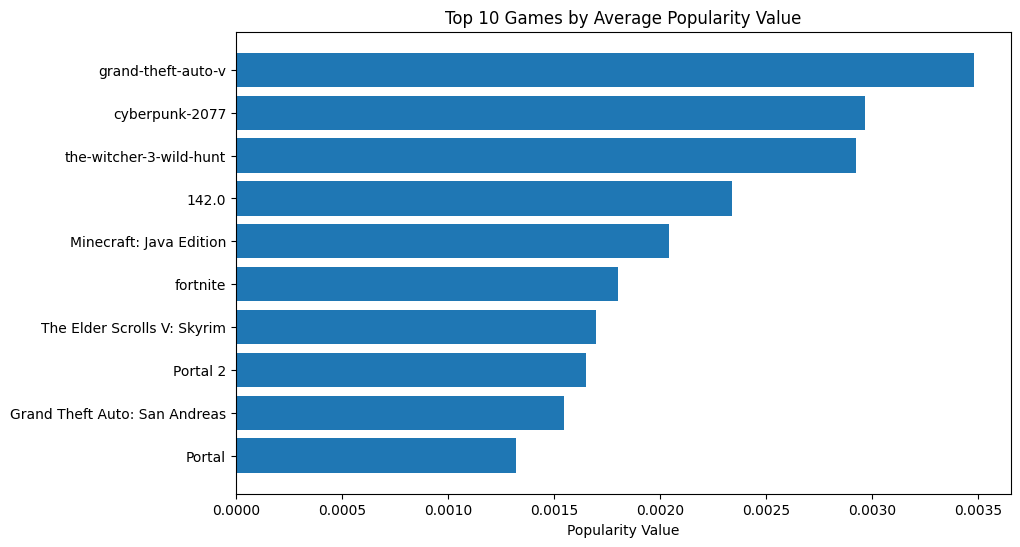

In [28]:
# What are the most popular games by popularity value?
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_games_df["game_name"], top_games_df["value"])
plt.gca().invert_yaxis()
plt.title("Top 10 Games by Average Popularity Value")
plt.xlabel("Popularity Value")
plt.show()

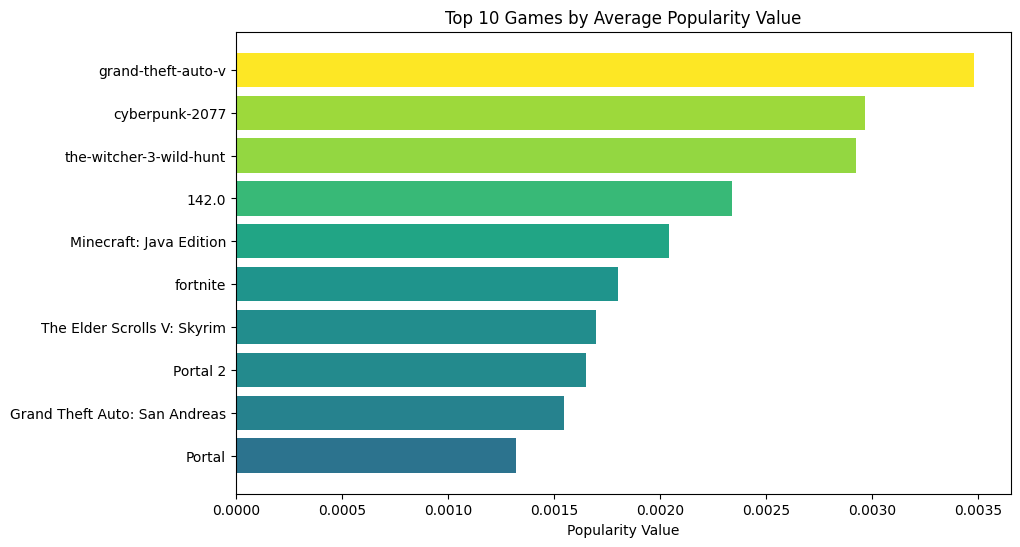

In [29]:
# Updated with color to highlight games with highest popularity value
# What are the most popular games by popularity value?
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
colors = plt.cm.viridis(top_games_df["value"] / top_games_df["value"].max())
plt.barh(top_games_df["game_name"], top_games_df["value"], color=colors)
plt.gca().invert_yaxis()
plt.title("Top 10 Games by Average Popularity Value")
plt.xlabel("Popularity Value")
plt.show()
